# **Impact of Outliers on the machine learning model**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/practise/housing.csv')

## **Outlier Detection:**

In [ ]:
#Detecting Outliers using Z-score:
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
outlier_indices = df.index[outliers]

In [ ]:
 #Detecting Outliers using IQR (Interquartile Range) method:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outliers]


<Axes: >

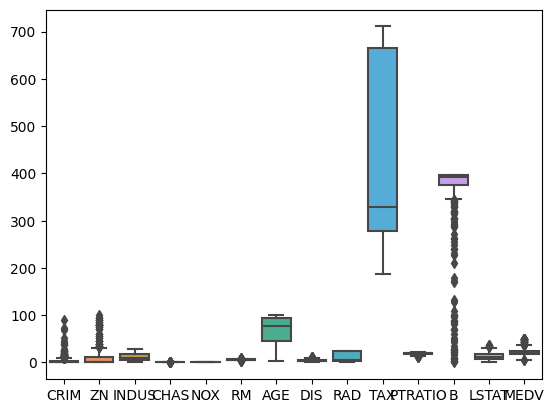

In [ ]:
#Using boxplot:
sns.boxplot(df)

In [ ]:
df.dropna(inplace=True)

## **Handling outliers**

In [ ]:
#Handling Outliers:
# Option 1: Remove rows with outliers
df_cleaned = df.drop(index=outlier_indices)

In [ ]:
#Building model using above data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = df_cleaned[['LSTAT','RM','TAX','PTRATIO','INDUS']]
y = df_cleaned['MEDV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the training and test datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)


Training MSE: 28.03604132711133
Test MSE: 23.91146798237936
Training R^2: 0.6484164138848482
Test R^2: 0.7670556235421719


In the 'underfitting'  notebook we had built the model without removing outliers. And observed the following:<br> Train accuracy:  0.6484164138848482
Test accuracy:  0.7670556235421719 <br>
We observe that the accuracy has slightly improved.